In [1]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

from rdkit import Chem
from mordred import Calculator, descriptors
from rdkit.Chem import rdMolDescriptors

from tqdm import tqdm

from mordred import Calculator, descriptors

random_seed = 42

In [2]:
df_new = pd.read_csv('../data/other_PFAS.csv', sep=';')

df_new['Mol'] = df_new.SMILES.apply(Chem.MolFromSmiles)
df_new['molecular_formula'] = df_new["Mol"].apply(rdMolDescriptors.CalcMolFormula)

def replace_f_with_h(mol):
    mol = Chem.RWMol(mol)
    for atom in mol.GetAtoms():
        if atom.GetSymbol() == "F":
            atom.SetAtomicNum(1)
    return mol.GetMol()

df_new["Mol"] = df_new["Mol"].apply(replace_f_with_h)
df_new["new_formula"] = df_new["Mol"].apply(rdMolDescriptors.CalcMolFormula)

df_new['atom_count'] = df_new['Mol'].apply(
    lambda mol: len([atom for atom in mol.GetAtoms() if atom.GetSymbol() == "C"])
)

calc = Calculator(descriptors.AdjacencyMatrix.AdjacencyMatrix(type='VE1'))
df_new['VE1'] = df_new['Mol'].apply(lambda x: calc(x)[0])

calc = Calculator(descriptors.WienerIndex.WienerIndex(polarity=False))
df_new['W'] = df_new['Mol'].apply(lambda x: calc(x)[0])

calc = Calculator(descriptors.ZagrebIndex.ZagrebIndex(version=1, variable=1))
df_new['M1'] = df_new['Mol'].apply(lambda x: calc(x)[0])

df_new['log_atom_count'] = df_new['atom_count'].apply(math.log)
df_new['log_W'] = df_new['W'].apply(math.log)
df_new['log_M1'] = df_new['M1'].apply(math.log)
df_new['log_VE1'] = df_new['VE1'].apply(math.log)

df_new_cyclic = df_new[df_new['cyclic'] == 'Y'].copy()
df_new_acyclic = df_new[df_new['cyclic'] == 'N'].copy()
df_new

,name,CAS,SMILES,cyclic,in_reaxys,measured_elsewhere,site,link,Mol,molecular_formula,new_formula,atom_count,VE1,W,M1,log_atom_count,log_W,log_M1,log_VE1
0,Perfluoro(n-butylcyclohexane),374-60-7,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C1(F)C(F)(F)C(F)(...,Y,Y,Y,Fluorochem,https://dougdiscovery.com/p/F009461,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.911662,133,42.0,2.302585,4.890349,3.737670,1.068724
1,(Nonafluorobutyl)undecafluorocyclohexane,374-60-7,C1(C(C(C(C(C1(F)F)(F)F)(F)F)(F)F)(F)F)(C(C(C(C...,Y,Y,Y,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.911662,133,42.0,2.302585,4.890349,3.737670,1.068724
2,"Perfluoro(1,3-diethylcyclohexane)",335-23-9,FC1(F)C(F)(C(F)(F)C(F)(F)C(F)(F)C1(F)C(F)(F)C(...,Y,N,N,Fluorochem,https://dougdiscovery.com/p/F996618,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.956156,121,44.0,2.302585,4.795791,3.784190,1.083890
3,"Perfluoro-2,4-dimethyl-3-ethyl pentane",50285-18-2,FC(F)(F)C(F)(F)C(F)(C(F)(C(F)(F)F)C(F)(F)F)C(F...,N,Y,Y,Fluorochem,https://dougdiscovery.com/p/F051171,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C9F20,C9H20,9,2.736735,90,36.0,2.197225,4.499810,3.583519,1.006766
4,Perfluoroeicosane,37589-57-4,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,N,N,N,Fluorochem,https://dougdiscovery.com/p/F009463,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C20F42,C20H42,20,4.118070,1330,74.0,2.995732,7.192934,4.304065,1.415385
5,Perfluoro(3-ethylpentane),2690-05-3,C(C(C(F)(F)F)(F)F)(C(C(F)(F)F)(F)F)(C(C(F)(F)F...,N,N,N,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C7F16,C7H16,7,2.449490,48,24.0,1.945910,3.871201,3.178054,0.895880
6,"Perfluoro(1,2-diethylcyclohexane)",75169-49-2,C1(C(C(C(C(C1(F)F)(F)F)(F)F)(F)F)(C(C(F)(F)F)(...,Y,N,N,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.936645,117,44.0,2.302585,4.762174,3.784190,1.077268
7,Perfluoroadamantane,69064-33-1,C12(C(C3(C(C(C1(F)F)(C(C(C2(F)F)(C3(F)F)F)(F)F...,Y,N,N,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F16,C10H16,10,3.146264,96,60.0,2.302585,4.564348,4.094345,1.146216
8,"Perfluoro(1,3-dimethyl-5-ethylcyclohexane)",155609-20-4,C1(C(C(C(C(C1(F)F)(C(F)(F)F)F)(F)F)(C(F)(F)F)F...,Y,N,Y,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.971035,116,46.0,2.302585,4.753590,3.828641,1.088911
9,Perfluoro[(tert-butyl)cyclohexane],84808-64-0,C1(C(C(C(C(C1(F)F)(F)F)(F)F)(F)F)(F)F)(C(C(F)(...,Y,Y,Y,Avantor,https://www.avantorsciences.com/cz/cs/product/...,<rdkit.Chem.rdchem.Mol object at 0x00000291DE6...,C10F20,C10H20,10,2.957596,114,48.0,2.302585,4.736198,3.871201,1.084377


# Predictions

In [17]:
df = pd.read_csv('../data/combined_data_with_all_descriptors.csv', sep=';')
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

In [27]:
df['carbon_count'] = df['Mol'].apply(
    lambda mol: len([atom for atom in mol.GetAtoms() if atom.GetSymbol() == "C"])
)
df['log_carbon_count'] = df['carbon_count'].apply(math.log)

In [33]:
df['log_ATS2se'] = df['ATS2se'].apply(math.log)
df['log_VR1_Dzm'] = df['VR1_Dzm'].apply(math.log)
df['log_VR1_Dzare'] = df['VR1_Dzare'].apply(math.log)

In [28]:
df.head(2)

,boiling_point,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,...,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES,Mol,carbon_count,log_carbon_count
0,103.75,25.920744,2.719227,5.438455,25.920744,0.996952,4.162678,4.256416,0.163708,2.403939,...,1237.0,63.0,146.0,184.0,18.5,4.9375,FC(F)(F)C(F)(F)C(F)(C(F)(F)F)C(F)(C(F)(F)F)C(F...,<rdkit.Chem.rdchem.Mol object at 0x00000291E4B...,8,2.079442
1,239.00,51.369087,2.708526,5.417052,51.369087,1.027382,4.824198,5.875713,0.117514,3.380265,...,8521.0,135.0,290.0,376.0,35.0,9.4375,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,<rdkit.Chem.rdchem.Mol object at 0x00000291E4B...,16,2.772589


In [34]:
df_sorted = df.sort_values(by='MW')

split_index = int(len(df_sorted) * 0.85)

df_train = df_sorted.iloc[:split_index].reset_index(drop=True)
df_test = df_sorted.iloc[split_index:].reset_index(drop=True)

print("Train set size:", len(df_train))
print("Test set size:", len(df_test))

Train set size: 22
Test set size: 5


## Polynomial fit

In [57]:
def evaluate_descriptor_PF(descriptor, df_train, df_test, df_new, plot_fit=False, plot_difference=False, degree=2):
    X_train = df_train[[descriptor]]
    y_train = df_train['boiling_point']
    X_test = df_test[[descriptor]]
    y_test = df_test['boiling_point']

    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    print("coefficients:", model.coef_)
    print("intercept:", model.intercept_)

    y_pred_test = model.predict(X_test_poly)

    rmse = root_mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    if plot_difference:
        y_pred_train = model.predict(X_train_poly)

        # # Plot true vs predicted
        # plt.figure(figsize=(6, 6))
        # plt.scatter(y_train, y_pred_train, alpha=0.7, label='Train', color='blue')
        # plt.scatter(y_test, y_pred_test, alpha=0.7, label='Test', color='green')
        # min_val = min(min(y_train), min(y_test))
        # max_val = max(max(y_train), max(y_test))
        # plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

        # plt.xlabel("True Boiling Point")
        # plt.ylabel("Predicted Boiling Point")
        # plt.title(f"True vs Predicted Boiling Point for {descriptor} (Polynomial)")
        # plt.legend()
        # plt.grid(True)
        # plt.tight_layout()
        # plt.show()

    print(f"'rmse': {rmse}, 'mae': {mae}, 'r2': {r2}")

    if plot_fit:
        # Plot the fitted curve
        x_min = min(df_train[descriptor].min(), df_test[descriptor].min())
        x_max = max(df_train[descriptor].max(), df_test[descriptor].max())
        x_vals = np.linspace(x_min, x_max, 200).reshape(-1, 1)
        x_vals_df = pd.DataFrame(x_vals, columns=[descriptor])
        x_vals_poly = poly.transform(x_vals_df)
        y_vals = model.predict(x_vals_poly)

        plt.figure(figsize=(6, 6))
        plt.scatter(X_train, y_train, color='#4C72B0', alpha=1, label='Train', s=60)
        plt.scatter(X_test, y_test, color='#E56317', alpha=1, label='Test', s=60)

        if df_new is not None:
            X_new = df_new[[descriptor]]
            X_new_poly = poly.transform(X_new)
            y_new_pred = model.predict(X_new_poly)
            plt.scatter(X_new, y_new_pred, color='orange', alpha=1, label='New (predicted)')

            # Add index labels
            for i, (x_val, y_val) in zip(df_new.index, zip(X_new[descriptor], y_new_pred)):
                plt.text(x_val, y_val, str(i), fontsize=12, color='black', ha='left', va='bottom')


        plt.plot(x_vals, y_vals, color='#333333', linewidth=2, label='Polynomial fit (deg 2)')

        plt.xlabel('ln(ATS2se)')
        plt.ylabel("Boiling point (°C)")
        # plt.title(f"Polynomial Regression Curve for {descriptor}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("../img/pfas_ood_pf.svg", format="svg")
        plt.show()

    return {'rmse': rmse, 'mae': mae, 'r2': r2}


### VE1

coefficients: [-193.87603407   29.769272  ]
intercept: 137.00047313076954
'rmse': 1.983649006306688, 'mae': 1.879546106587719, 'r2': 0.9962816066094053


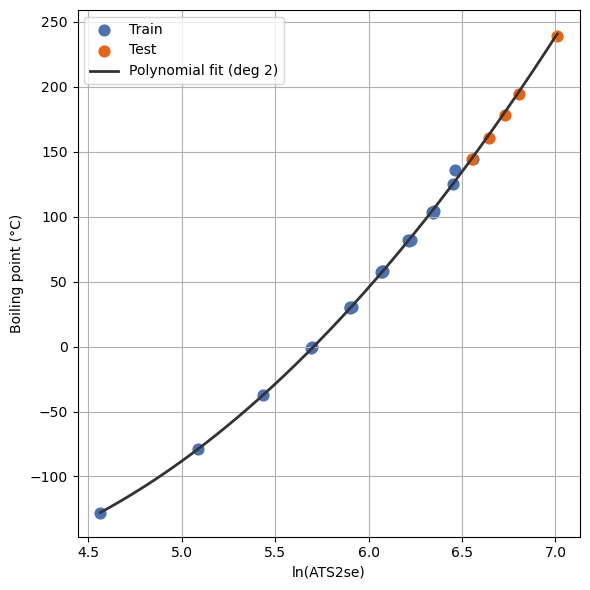

{'rmse': 1.983649006306688, 'mae': 1.879546106587719, 'r2': 0.9962816066094053}

In [58]:
metrics_PF_VE1 = evaluate_descriptor_PF('log_ATS2se', df_train, df_test, df_new=None, plot_fit=True, degree=2)
metrics_PF_VE1

### M1

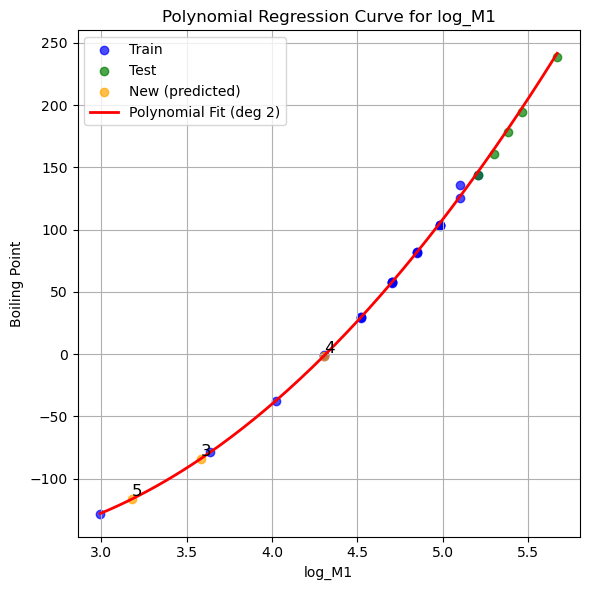

In [25]:
metrics_PF_M1 = evaluate_descriptor_PF('log_M1', df_train, df_test, df_new=df_new_acyclic, plot_fit=True, degree=2)

### W

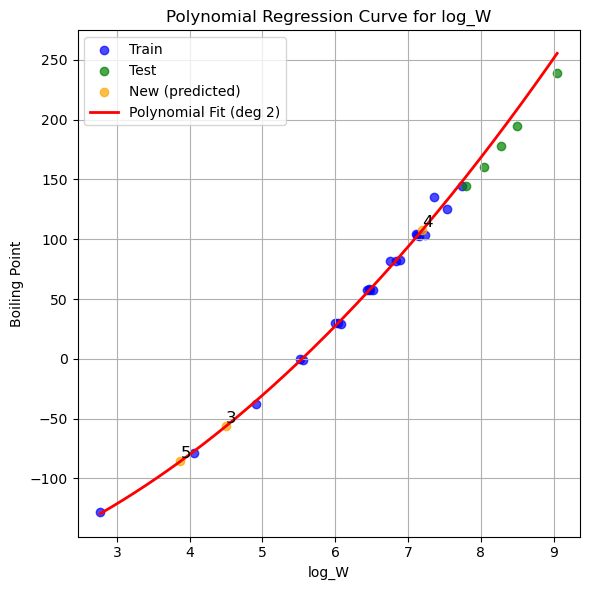

In [26]:
metrics_PF_W = evaluate_descriptor_PF('log_W', df_train, df_test, df_new=df_new_acyclic, plot_fit=True, degree=2)

### Atom count

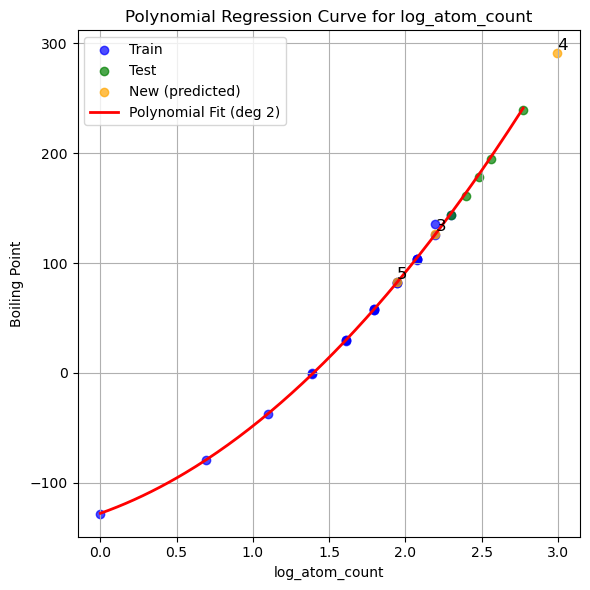

In [27]:
metrics_PF_AC = evaluate_descriptor_PF('log_atom_count', df_train, df_test, df_new=df_new_acyclic, plot_fit=True, degree=2)